# World On Rails Baseline Model 

This baseline model is a random agent that applies constant throttle and random steering. It reads data and applies a policy.

### Data Reading

In [1]:
include("../data/data.jl")
using .Data

In [2]:
DATA_ROOT = "/home/enes/avg/WoR/dataset"
CONFIG_PATH = "/home/enes/avg/WoR/WorldOnRails/config.yaml"

"/home/enes/avg/WoR/WorldOnRails/config.yaml"

In [3]:
ds = Data.MainDataset(DATA_ROOT, CONFIG_PATH)


/home/enes/avg/WoR/dataset: 1877 frames x 3

Main.Data.MainDataset(Dict{Any, Any}("ego_model_dir" => "/kuacc/users/merciyes18/WorldOnRails/ego_model.th", "num_plan" => 5, "camera_yaws" => [0, -30, 30], "multi_cam" => true, "num_orient" => 5, "num_throts" => 3, "all_speeds" => true, "temperature" => 0.01, "ego_data_dir" => ["PATH TO PHASE 0 DATA"], "min_speeds" => 0.0…), 1877, Dict{Any, Any}(4986 => LMDB.Transaction(Ptr{Nothing} @0x0000000003111b50), 4700 => LMDB.Transaction(Ptr{Nothing} @0x00000000060df0f0), 4576 => LMDB.Transaction(Ptr{Nothing} @0x00000000060df0f0), 2288 => LMDB.Transaction(Ptr{Nothing} @0x00000000049c65e0), 1703 => LMDB.Transaction(Ptr{Nothing} @0x00000000047c3650), 1956 => LMDB.Transaction(Ptr{Nothing} @0x000000000515f5d0), 2350 => LMDB.Transaction(Ptr{Nothing} @0x00000000049c65e0), 3406 => LMDB.Transaction(Ptr{Nothing} @0x00000000073f81d0), 2841 => LMDB.Transaction(Ptr{Nothing} @0x0000000003195cd0), 2876 => LMDB.Transaction(Ptr{Nothing} @0x0000000003195cd0)…), Dict{Any, Any}(4986 => LMDB.DBI(0x00000001, ""), 

In [ ]:
@time data = Data.get_item(ds, 1024)

In [6]:
# return wide rgb image
data[1]

240×480×3 PermutedDimsArray(reinterpret(reshape, FixedPointNumbers.N0f8, ::Array{RGB{N0f8},2}), (2, 3, 1)) with eltype FixedPointNumbers.N0f8:
[:, :, 1] =
 0.22   0.271  0.325  0.353  0.365  …  0.212  0.212  0.212  0.212  0.212
 0.204  0.235  0.282  0.322  0.349     0.216  0.212  0.212  0.212  0.216
 0.212  0.208  0.239  0.298  0.341     0.216  0.212  0.216  0.216  0.216
 0.227  0.2    0.212  0.278  0.329     0.216  0.216  0.216  0.22   0.22
 0.227  0.196  0.192  0.243  0.294     0.208  0.208  0.212  0.224  0.224
 0.247  0.227  0.212  0.224  0.263  …  0.212  0.212  0.216  0.227  0.227
 0.255  0.263  0.235  0.208  0.231     0.212  0.212  0.216  0.22   0.224
 0.243  0.267  0.235  0.18   0.192     0.212  0.212  0.22   0.224  0.224
 0.286  0.267  0.239  0.208  0.196     0.204  0.212  0.216  0.224  0.227
 0.325  0.29   0.259  0.231  0.208     0.204  0.216  0.22   0.227  0.231
 0.353  0.302  0.267  0.255  0.227  …  0.212  0.216  0.224  0.235  0.239
 0.357  0.302  0.271  0.278  0.247     0.21

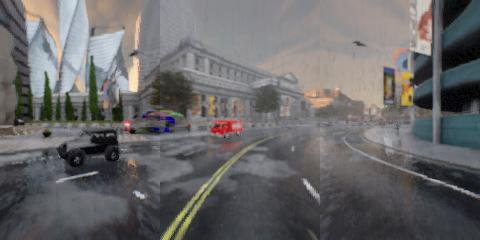

In [9]:
# visualize wide rgb image
using Images
colorview(RGB, permuteddimsview(data[1], (3,1,2)))

In [10]:
# iterating over the dataset
x = () -> for data in ds end

#1 (generic function with 1 method)

In [11]:
@time x()

 38.399945 seconds (22.53 M allocations: 28.461 GiB, 1.79% gc time, 0.05% compilation time)


## Baseline Implementation

In [25]:
include("baseline.jl")

In [26]:
baseline = BaselineRandomAgent(
    Chain(Conv(5,5,3,8), Conv(5,5,8,16), Conv(5,5,16, 32), Conv(5,5, 32, 32), Conv(5,5, 32, 32), Dense(3*11*32, 256), Dense(256, 16), Dense(16,3)))

BaselineRandomAgent(Chain((Conv(P(KnetArray{Float32, 4}(5,5,3,8)), P(KnetArray{Float32, 4}(1,1,8,1)), Knet.Ops20.relu, 0), Conv(P(KnetArray{Float32, 4}(5,5,8,16)), P(KnetArray{Float32, 4}(1,1,16,1)), Knet.Ops20.relu, 0), Conv(P(KnetArray{Float32, 4}(5,5,16,32)), P(KnetArray{Float32, 4}(1,1,32,1)), Knet.Ops20.relu, 0), Conv(P(KnetArray{Float32, 4}(5,5,32,32)), P(KnetArray{Float32, 4}(1,1,32,1)), Knet.Ops20.relu, 0), Conv(P(KnetArray{Float32, 4}(5,5,32,32)), P(KnetArray{Float32, 4}(1,1,32,1)), Knet.Ops20.relu, 0), Dense(P(Knet.KnetArrays.KnetMatrix{Float32}(256,1056)), P(Knet.KnetArrays.KnetVector{Float32}(256)), Knet.Ops20.relu, 0), Dense(P(Knet.KnetArrays.KnetMatrix{Float32}(16,256)), P(Knet.KnetArrays.KnetVector{Float32}(16)), Knet.Ops20.relu, 0), Dense(P(Knet.KnetArrays.KnetMatrix{Float32}(3,16)), P(Knet.KnetArrays.KnetVector{Float32}(3)), Knet.Ops20.relu, 0))))

In [27]:
x = KnetArray{Float32}(reshape(data[1], size(data[1])..., 1))

240×480×3×1 KnetArray{Float32, 4}:
[:, :, 1, 1] =
 0.219608  0.270588  0.32549   0.352941  …  0.211765  0.211765  0.211765
 0.203922  0.235294  0.282353  0.321569     0.211765  0.211765  0.215686
 0.211765  0.207843  0.239216  0.298039     0.215686  0.215686  0.215686
 0.227451  0.2       0.211765  0.278431     0.215686  0.219608  0.219608
 0.227451  0.196078  0.192157  0.243137     0.211765  0.223529  0.223529
 0.247059  0.227451  0.211765  0.223529  …  0.215686  0.227451  0.227451
 0.254902  0.262745  0.235294  0.207843     0.215686  0.219608  0.223529
 0.243137  0.266667  0.235294  0.180392     0.219608  0.223529  0.223529
 0.286275  0.266667  0.239216  0.207843     0.215686  0.223529  0.227451
 0.32549   0.290196  0.258824  0.231373     0.219608  0.227451  0.231373
 0.352941  0.301961  0.266667  0.254902  …  0.223529  0.235294  0.239216
 0.356863  0.301961  0.270588  0.278431     0.227451  0.239216  0.243137
 0.356863  0.309804  0.290196  0.290196     0.235294  0.239216  0.243137
 

In [28]:
actions = baseline(x)

3×1 Knet.KnetArrays.KnetMatrix{Float32}:
 0.020348264
 0.01395645
 0.0075935517

In [29]:
loss = baseline(x, actions)

0.0f0